In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import os
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Define file paths
file_paths = {
    'data_2018': '/content/drive/MyDrive/data_2018.csv',
    'data_2019': '/content/drive/MyDrive/data_2019.csv',
    'data_2020': '/content/drive/MyDrive/data_2020.csv',
    'data_2021': '/content/drive/MyDrive/data_2021.csv',
    'data_2022': '/content/drive/MyDrive/data_2022.csv'
}

# Initialize a dictionary to store the dataframes
dataframes = {}

# Load each CSV file into a separate dataframe
for key, path in file_paths.items():
    if os.path.isfile(path):
        dataframes[key] = pd.read_csv(path)
        print(f"Loaded {key} with {dataframes[key].shape[0]} rows and {dataframes[key].shape[1]} columns.")
    else:
        print(f"Could not find file: {path}")

# Access each dataframe using its key
df_2018 = dataframes.get('data_2018')
df_2019 = dataframes.get('data_2019')
df_2020 = dataframes.get('data_2020')
df_2021 = dataframes.get('data_2021')
df_2022 = dataframes.get('data_2022')

# Display the first few rows of each dataframe to confirm they are loaded
print("DataFrame for 2018:")
print(df_2018.head(), "\n")

print("DataFrame for 2019:")
print(df_2019.head(), "\n")

print("DataFrame for 2020:")
print(df_2020.head(), "\n")

print("DataFrame for 2021:")
print(df_2021.head(), "\n")

print("DataFrame for 2022:")
print(df_2022.head(), "\n")

Loaded data_2018 with 1442473 rows and 12 columns.
Loaded data_2019 with 1616186 rows and 12 columns.
Loaded data_2020 with 1200537 rows and 12 columns.
Loaded data_2021 with 1661026 rows and 12 columns.
Loaded data_2022 with 2534161 rows and 12 columns.
DataFrame for 2018:
     user_id    bill_id  line_item_amount  bill_discount transaction_date  \
0  403252497  401641461            1049.5            0.0       2018-08-11   
1  357000026  397716483             659.4            0.0       2018-07-22   
2  372773935  362298787            1899.0            0.0       2018-01-12   
3  362714910  360637282            1799.0            0.0       2018-01-03   
4  393891557  374396867            1299.0            0.0       2018-03-29   

                                         description  \
0  TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...   
1            MB ITA14BLT016 35MM NA Olive Green 32 /   
2              TR S15-NELSON FF KANSAS Tan 36 / 92CM   
3           TR S15-BRANDON FF KANSAS K

In [ ]:
df18 = pd.read_csv('/content/drive/MyDrive/data_2018.csv', parse_dates=['transaction_date'], date_format='%Y-%m-%d')
df19 = pd.read_csv('/content/drive/MyDrive/data_2019.csv', parse_dates=['transaction_date'], date_format='%Y-%m-%d')
df20 = pd.read_csv('/content/drive/MyDrive/data_2020.csv', parse_dates=['transaction_date'], date_format='%Y-%m-%d')
df21 = pd.read_csv('/content/drive/MyDrive/data_2021.csv', parse_dates=['transaction_date'], date_format='%Y-%m-%d')
df22 = pd.read_csv('/content/drive/MyDrive/data_2022.csv', parse_dates=['transaction_date'], date_format='%Y-%m-%d')

In [ ]:
total = pd.concat([df18,df19,df20,df21,df22],axis=0)
print(total.shape)
total.sample(5)

(8454383, 12)


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
321039,463665883,584207691,1799.0000,0.0,2020-11-15,MSH ITMSH02958 Slim LS Yellow S,MSH ITMSH02958 Slim LS Yellow S,Yellow,S,South,South_7077,2020
594359,329724476,768592718,1829.6248,1000.0,2022-10-09,MSH ITMSH04434 Slim LS Red XL,MSH ITMSH04434 Slim LS Red XL,NOT-CAPTURED,NOT-CAPTURED,South,South_7268,2022
1053572,280891323,468471280,2899.0000,0.0,2019-06-04,MSH ITMSH01130 Slim LS Red L,MSH ITMSH01130 Slim LS Red L,Red,L,South,South_7123,2019
1394999,408609735,614009371,8.0138,0.0,2021-03-18,CBG ITCBR00001 NA NA WHITE 12X4X16,CBG ITCBR00001 NA NA White 12x4x16``,NOT-CAPTURED,NOT-CAPTURED,South,South_7005,2021
162360,446550639,534752605,2999.5000,0.0,2020-01-26,MJA ITMJA00144 SportCoat LS Navy M,MJA ITMJA00144 SportCoat LS Navy M,Navy,M,West,West_7280,2020


In [ ]:
# extract weekday and month from transaction date
total['month'] = total['transaction_date'].dt.month_name()
total['weekday'] = total['transaction_date'].dt.day_name()
total.sample(5)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
1758952,533023781,786367435,2599.0000,0.0,2022-12-03,MSH ITMSH04786 Slim LS Amber L,MSH ITMSH04786 Slim LS Amber L,NOT-CAPTURED,NOT-CAPTURED,South,South_7270,2022,December,Saturday
844572,367869385,644366821,1069.8809,2000.0,2021-08-30,MSH ITMSH03074 SLIM LS Ocean XL,NaN,Ocean,XL,South,South_7149,2021,August,Monday
565886,446050430,533021573,1999.0000,0.0,2020-01-20,MSH ITMSH01808 Slim LS Pale Blue M,MSH ITMSH01808 Slim LS Pale Blue M,Pale Blue,M,East,East_7007,2020,January,Monday
15284,329987725,466666599,1417.1715,0.0,2019-05-29,MTS ITMTS00381 Regular SS Prussian L,MTS ITMTS00381 Regular SS Prussian L,Prussian,L,South,South_7149,2019,May,Wednesday
530341,3327784,395725356,1038.8150,0.0,2018-07-12,ITMSH00192,Mens Shirt - Sportswear,Red,S,South,South_7115,2018,July,Thursday


In [ ]:
def get_product(txt,pattern):
    if isinstance(txt, str):

        #search and check if split word exists
        searched_word = re.search(pattern, txt)

        #word exists
        if searched_word:
            splitted_string = re.split(pattern, txt)[0]
            # check if empty list is returned->when there is only pattern available in 'txt'
            if splitted_string == '':
                return 'Unknown'
            else:
                return splitted_string.strip()

        #split word not exists(but the product name can still be present , so we'll need the entire string)
        else:
            return txt

    # any other value found other than string datatype
    else:
        return 'Unknown'

total['desc_copy'] = total['description'].copy()
total['desc_copy'] = total['desc_copy'].fillna('Unknown')

#for patterns starting with IT,CORE-, A16-,A17-,S16-,S18-,TBA07SD7890(LENGTH=11)
total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))

#product names are acronyms are their lengths are not greater than 2.
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)

#removing inconsistent data
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)

<ipython-input-7-3cc2e94fcd6c>:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))
<ipython-input-7-3cc2e94fcd6c>:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)
<ipython-input-7-3cc2e94fcd6c>:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)


In [ ]:
# removing more inconsistent data
invalid_vals = ['CALandLine', 'CAMobile', 'Cashier','PendingOrders','DOB', 'DOA', 'LastVisit', 'Points',
'Anniversary', 'CashierMBO','OrderCashier','CreditLimit',
'DateOfAnniversary', 'OtherDetails', 'IsReminderRequired', 'AgreeToReceiveSMS', 'Gender', 'AwarenessSourceRemarks',
'AllowCredit', 'CreditDays', 'AgreeToReceiveCall', 'DateOfBirth','Administrator','MRPValue','CGST', 'BatchDescription',
'TaxDescription', 'IsActive', 'CardExpiryDate','DealerType','DND','DEFAULT']

total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)

<ipython-input-8-ad7312244f72>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)


In [ ]:
total['ic_copy'] = total['inventory_category'].copy()
total['ic_copy'] = total['ic_copy'].fillna('Unknown')
total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))

total['colour'] = total['colour'].fillna('Unknown')
total['colour'] = total['colour'].str.replace('NOT-CAPTURED','Unknown')

total['size'] = total['size'].fillna('Unknown')
total['size'] = total['size'].str.replace('NOT-CAPTURED','Unknown')

<ipython-input-101-30273292ede0>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))


In [ ]:
replace = {
  'TR':'MENS TROUSER',
  'MSP':'MENS SPORTSCOAT',
  'BSP':'MENS SPORTSCOAT',
  'TWB': 'MENS TROUSER WITH BELT',
  'JKT': 'MENS JACKET',
  'SH':'MENS SHIRT',
  'MSH':'MENS SHIRT',
  'MTR':'MENS TROUSER WITH BELT',
  'MBL':'MENS BELT',
  'MB' : 'OTHERS',
  'BLT':'MENS BELT',
  'SR':'MENS SHORTS',
  'MTS':'MENS T-SHIRT',
  'TS':'MENS T-SHIRT',
  'BSH':'BOYS SHIRT',
  'SW':'MENS SWEATER',
  'BDE':'BOYS DENIM',
  'MFW':'MENS FOOTWEAR',
  'FW':'MENS FOOTWEAR',
  'BDNM':'BOYS DENIM',
  'SX':'MENS SOCKS',
  'MSO':'MENS SHORTS',
  'SO':'MENS SHORTS',
  'MDE':'MENS DENIM',
  'BTS':'BOYS T-SHIRT',
  'BSO':'BOYS SHORTS',
  'MDNM':'MENS DENIM',
  'BTR':'BOYS TROUSER',
  'MSW':'MENS SWEATER',
  'SCKS':'MENS SOCKS',
  'MSX':'MENS SOCKS',
  'BSW':'BOYS SWEATER',
  'MJKT':'MENS JACKET',
  'MJA':'MENS JACKET',
  'BJKT':'BOYS JACKET',
  'BJO':'BOYS Jogger',
  'MSC':'MENS JACKET',
  'BS':'BOYS SHIRT',
  'MWL':'Mens Wallet - Sportswear',
  'BJA':'BOYS JACKET',
  'BSR':'BOYS SHORTS',
  'MDN':'MENS Denim Trouser',
  'BDN':'Boys Denim Trouser - Jeanswear',
  'KT':'MENS KNIT TROUSER',
  'MJGR':'MENS JOGGER',
  'TBG':'Trolley Bag',
  'CBG':'CARRY BAG',
  'MTIE':'MALE TIE',
  'BTIE':'BOYS TIE',
  'MJO':'MENS JOGGER',
  'MWC':'MENS BANDI',
  'MS': 'MENS SOCKS',
  'WLT': 'MENS WALLET',
  'BBG': 'ACCESSORIES',
  'LBG': 'ACCESSORIES',
  'soap': 'ACCESSORIES',
  'MSS': 'MENS SHORTS',
  'BSS': 'BOYS SHORTS',
  'B': 'ACCESSORIES',
  'FFT': 'ACCESSORIES',
  'CCB': 'ACCESSORIES',
  'FFB': 'ACCESSORIES',
  'BCP': 'ACCESSORIES',
  'MBX': 'MENS BOXERS',
  'BWC': 'BOYS WAISTCOAT',
  'WOthers': 'OTHERS',
  'WOTHERS': 'OTHERS',
  'BMK': 'BOYS MASK',
  'MMK': 'MENS MASK',
  'MRG': 'OTHERS',
  'HHP': 'ACCESSORIES',
  'CTRIMS': 'OTHERS',
  'CTrims': 'OTHERS',
  'COthers': 'OTHERS',
  'COTHERS': 'OTHERS',
  'MBG': 'MENS BAG'
}

total['product'] = total['product'].map(lambda x: replace[x] if x in replace.keys() else x)

In [ ]:
# Assuming filtered_df is already defined
total['quantity'] = 1

In [ ]:
print(total["product"].nunique())
print(total["product"].unique())

20
['TROUSERS' 'OTHERS' 'DENIM' 'JACKET' 'SHIRTS' 'ACCESSORIES' 'MENS SHORTS'
 'MENS T-SHIRT' 'BOYS SHIRT' 'MENS SWEATER' 'MENS FOOTWEAR' 'BOYS T-SHIRT'
 'BOYS SHORTS' 'Unknown' 'BOYS SWEATER' 'BOYS Jogger' 'MENS BANDI'
 'MENS SPORTSCOAT' 'MENS BOXERS' 'BOYS WAISTCOAT']


In [ ]:
total['product'] = total['product'].replace(['MENS BELT',
                                             'MENS SOCKS',
                                             'MENS WALLET',
                                             'Mens Wallet - Sportswear',
                                             'ACCESSORIES',
                                             'Trolley Bag',
                                             'CARRY BAG',
                                             'DUFFELBAG',
                                             'MALE TIE',
                                             'BOYS TIE',
                                             'BOYS MASK',
                                             'MENS MASK',
                                             'MENS BAG'
                                             ],'ACCESSORIES')
total['product'] = total['product'].replace(['MENS SHIRT',
                                             'SHIRT'
                                             ],'SHIRTS')
total['product'] = total['product'].replace(['Unknown',
                                             'OTHERS'
                                             ],'OTHERS')

In [ ]:
# Convert each category name to proper case
total['product'] = total['product'].str.title()
print(total["product"].unique())

['Trousers' 'Others' 'Denim' 'Jacket' 'Shirts' 'Accessories' 'Mens Shorts'
 'Mens T-Shirt' 'Boys Shirt' 'Mens Sweater' 'Mens Footwear' 'Boys T-Shirt'
 'Boys Shorts' 'Boys Sweater' 'Boys Jogger' 'Mens Bandi' 'Mens Sportscoat'
 'Mens Boxers' 'Boys Waistcoat']


In [ ]:
total.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday,desc_copy,product,ic_copy,quantity
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,44 / 112CM,East,East_7096,2018,August,Saturday,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,MENS TROUSER,TROUSER,1
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,32 / 97CM,North,North_7018,2018,July,Sunday,MB ITA14BLT016 35MM NA Olive Green 32 /,MB,MB ITA14BLT016 35MM Olive Green 32 - 97CM,1
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,36 / 92CM,North,North_6505,2018,January,Friday,TR S15-NELSON FF KANSAS Tan 36 / 92CM,MENS TROUSER,TROUSER,1
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,32 / 82CM,North,North_6505,2018,January,Wednesday,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,MENS TROUSER,TROUSER,1
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,38 / 112CM,East,East_7310,2018,March,Thursday,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,MB,ITA15BLT004-40MM,1


In [ ]:
## products with highest sales
highest_sales_products = total.groupby(['product'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_products[:10]

,line_item_amount
product,
soap,50000.0000
MENS SPORTSCOAT,4810.7656
MENS BANDI,3373.9610
MENS JACKET,3060.1145
MENS Denim Trouser,2499.0000
MENS FOOTWEAR,1999.6000
MENS DENIM,1999.0000
MENS TROUSER WITH BELT,1954.5580
MENS SHIRT,1819.3000


In [ ]:
# most discounted products
highest_discounted_products = total[total['product']!='Unknown'].groupby(['product'])['bill_discount'].median().sort_values(ascending=False)
highest_discounted_products[:10]

,bill_discount
product,
SHirts,151.85
B,0.00
MENS SWEATER,0.00
MENS BANDI,0.00
MENS BELT,0.00
MENS DENIM,0.00
MENS Denim Trouser,0.00
MENS FOOTWEAR,0.00
MENS JACKET,0.00


In [ ]:
# comman(or most buyed) products
comman_products = total[total['product']!='Unknown'].groupby(['product'])['product'].count().sort_values(ascending=False)
comman_products[:10]

,product
product,
MENS SHIRT,2706356
MENS TROUSER WITH BELT,1175228
CARRY BAG,808099
MENS T-SHIRT,521117
MENS DENIM,470342
CTRIMS,275206
Trolley Bag,227672
BOYS SHIRT,169366
SHirts,141122


In [ ]:
# sales of products with colour
products_with_colour = total[(total['product']!='Unknown')&(total['colour']!='Unknown')].groupby(['product','colour'])['line_item_amount'].median().reset_index().sort_values('line_item_amount',ascending=False)
products_with_colour[:10]

,product,colour,line_item_amount
612,MENS JACKET,Lt Khaki,5637.78100
953,MENS SPORTSCOAT,Orange,4894.61870
943,MENS SPORTSCOAT,Blue,4837.52900
948,MENS SPORTSCOAT,Grey,4765.60450
952,MENS SPORTSCOAT,Navy,4740.02830
628,MENS JACKET,Sky,4652.19575
615,MENS JACKET,Mud,4600.00000
951,MENS SPORTSCOAT,Natural,4549.30000
944,MENS SPORTSCOAT,Brown,4499.25000
600,MENS JACKET,Deep Grey,4499.25000


In [ ]:
# highest sales of products with size
products_with_size = total[(total['product']!='Unknown')&(total['size']!='Unknown')].groupby(['product','size'])['line_item_amount'].median().sort_values(ascending=False)
products_with_size[:10]

product          size
MENS SPORTSCOAT  2XL     4815.8930
                 S       4799.2000
                 M       4645.3330
                 XL      4499.2500
                 L       4499.2500
                 3XL     4388.4642
MENS BANDI       S       3410.7388
                 M       3410.7388
                 2XL     3359.2000
MENS SPORTSCOAT  EEL     3334.2638
Name: line_item_amount, dtype: float64

In [ ]:
# What is the total revenue for every year?
total_sales_every_year = total.groupby(['year'])['line_item_amount'].sum()
total_sales_every_year

,line_item_amount
year,
2018,1.900333e+09
2019,2.103860e+09
2020,1.579160e+09
2021,2.302388e+09
2022,3.399087e+09


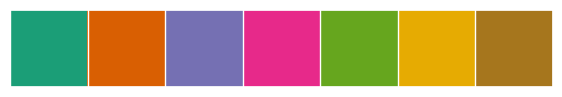

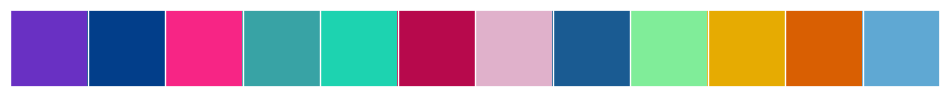

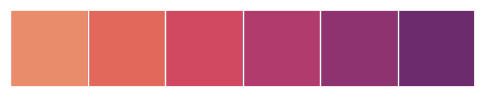

In [ ]:
qual_colors1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
qual_colors1 = sns.color_palette(sns.color_palette(qual_colors1))
sns.palplot(qual_colors1)

qual_colors2 = ['#6930c3','#023e8a','#F72585','#38a3a5','#1dd3b0','#b7094c','#e0b1cb','#1a5b92','#80ed99','#e6ab02','#d95f02','#5fa8d3']
qual_colors2 = sns.color_palette(sns.color_palette(qual_colors2))
sns.palplot(qual_colors2)

num_pal = sns.color_palette("flare")
sns.palplot(num_pal)

In [ ]:
def lineplot(data,x,y,hue,hue_order,title=None,xlabel=None):
    plot = sns.lineplot(data=data,x=x,y=y,markers=True, dashes=True,hue=hue,hue_order=hue_order,style=hue,palette=qual_colors2)
    plt.xlabel(xlabel)
    plt.ylabel(f'{y}')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.0, 0.9), loc='upper left')
    return plot

def barplot(x,y,data=None,ax=None,order=None,palette=qual_colors2,labelrotation=0,title=None):
    plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
    ax.bar_label(plot1.containers[0])
    ax.set_xlabel('')
    ax.set_ylabel(f'{y}')
    ax.set_title(title)
    ax.tick_params(labelrotation=labelrotation)
    return plot1

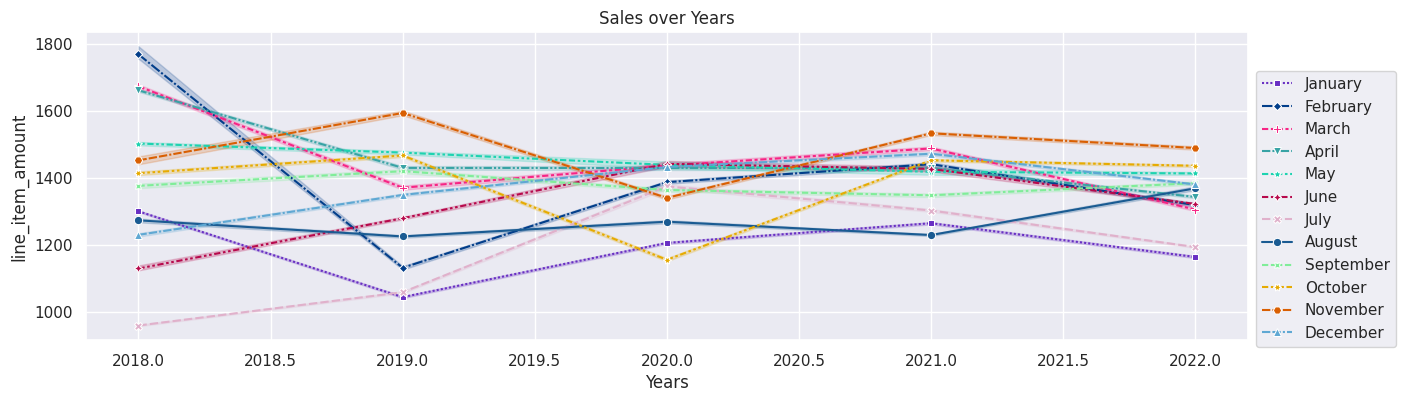

In [ ]:
#sales trends over different years or months
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig = plt.figure(figsize=(15,4))
lineplot(data=total,x="year",y='line_item_amount',hue='month',hue_order=month_order,title='Sales over Years',xlabel='Years')
# fig.supxlabel('Years')
fig.show()

<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)


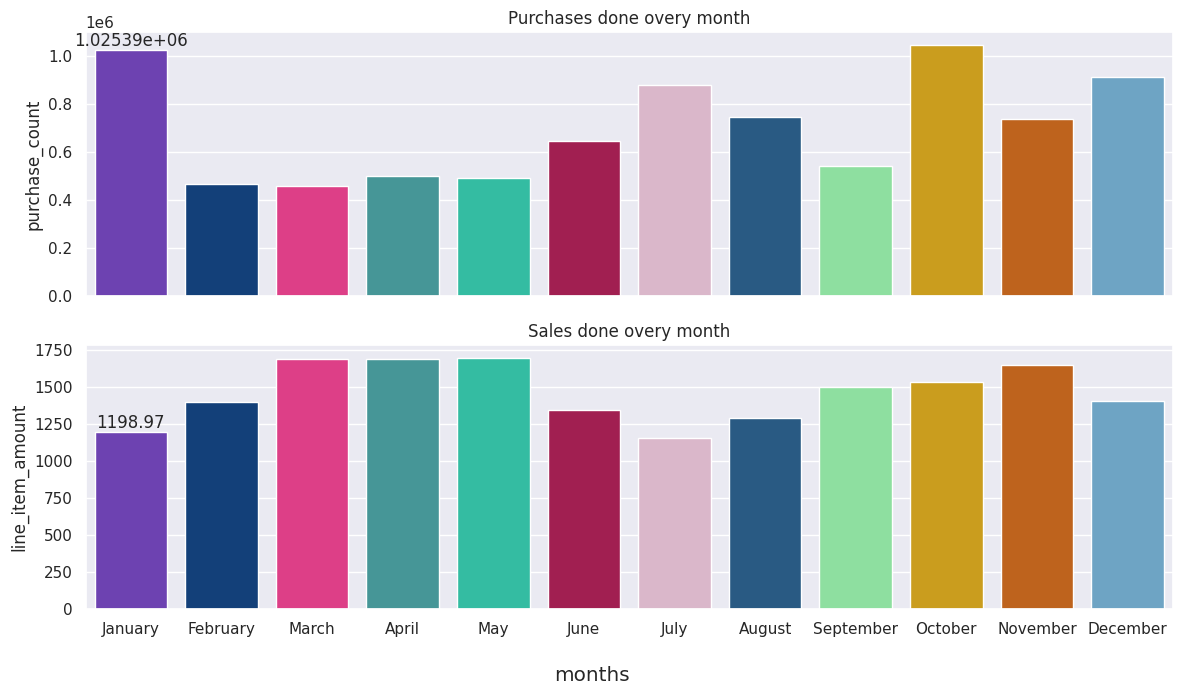

In [ ]:
# number of purcheses made each month
purchases_on_each_month = pd.DataFrame(total.groupby(['month'])['month'].count()).rename(columns={'month':'purchase_count'}).reset_index()

# average sales on each month
sales_on_months = total.groupby(['month'])['line_item_amount'].median().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,7),sharex=True)
barplot(data=purchases_on_each_month,x='month',y='purchase_count',ax=ax1,order=month_order,title='Purchases done overy month')

barplot(data=sales_on_months,x='month',y='line_item_amount',ax=ax2,order=month_order,title='Sales done overy month')
fig.supxlabel('months')

fig.tight_layout()

<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)


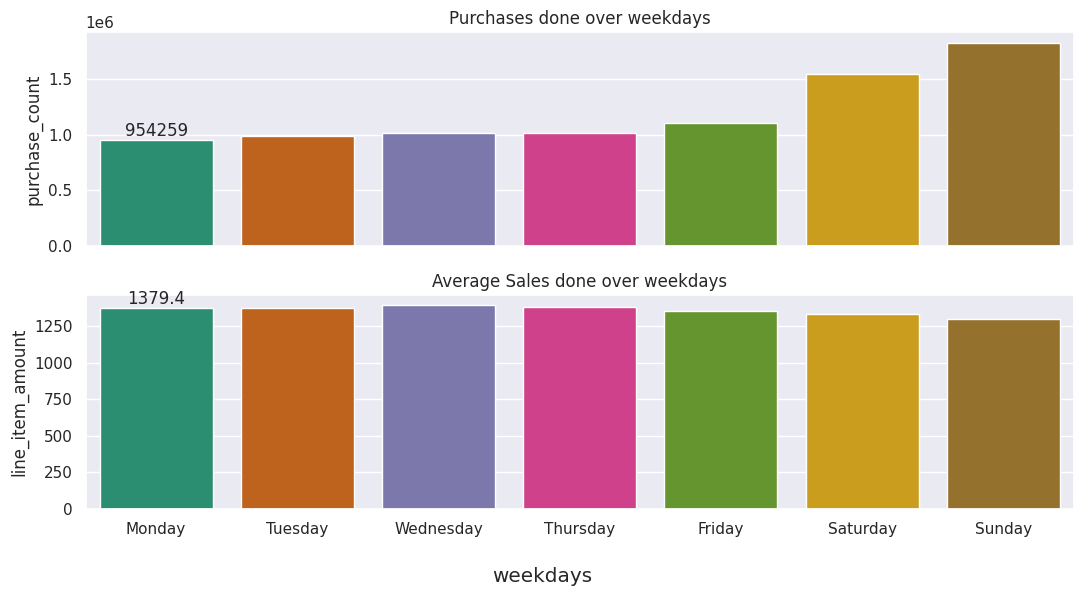

In [ ]:
# Busiest shopping times of the day or week
purchases_on_weekdays = pd.DataFrame(total.groupby(['weekday'])['weekday'].count()).rename(columns={'weekday':'purchase_count'}).reset_index()

# average sales on each weekday
sales_on_weekdays = total.groupby(['weekday'])['line_item_amount'].median().reset_index()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(11,6),sharex=True)
barplot(data=purchases_on_weekdays,x='weekday',y='purchase_count',ax=ax1,order=week_order,palette=qual_colors1,title='Purchases done over weekdays')

barplot(data=sales_on_weekdays,x='weekday',y='line_item_amount',ax=ax2,order=week_order,palette=qual_colors1,title='Average Sales done over weekdays')
fig.supxlabel('weekdays')

fig.tight_layout()

In [ ]:
# Items most bought each year
yearly_most_buyed = total[(total['product']!='Unknown')].groupby(['year','product'])['product'].count().sort_values(ascending=False)
yearly_most_buyed[:10]

,,product
year,product,
2022,MENS SHIRT,846856
2019,MENS SHIRT,588494
2021,MENS SHIRT,551088
2020,MENS SHIRT,420666
2022,MENS TROUSER WITH BELT,362136
2018,MENS SHIRT,299252
2022,CTRIMS,275206
2019,MENS TROUSER WITH BELT,270771
2021,MENS TROUSER WITH BELT,236944


In [ ]:
# Items most bought each month and weekday
monthly_most_buyed = total[(total['product']!='Unknown')].groupby(['month','weekday','product'])['product'].count().sort_values(ascending=False)
monthly_most_buyed[:10]

,,,product
month,weekday,product,
January,Sunday,MENS SHIRT,80751
October,Sunday,MENS SHIRT,73653
January,Saturday,MENS SHIRT,69099
October,Saturday,MENS SHIRT,65622
July,Sunday,MENS SHIRT,64139
August,Sunday,MENS SHIRT,58776
December,Sunday,MENS SHIRT,58139
July,Saturday,MENS SHIRT,54972
December,Saturday,MENS SHIRT,54725


<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)


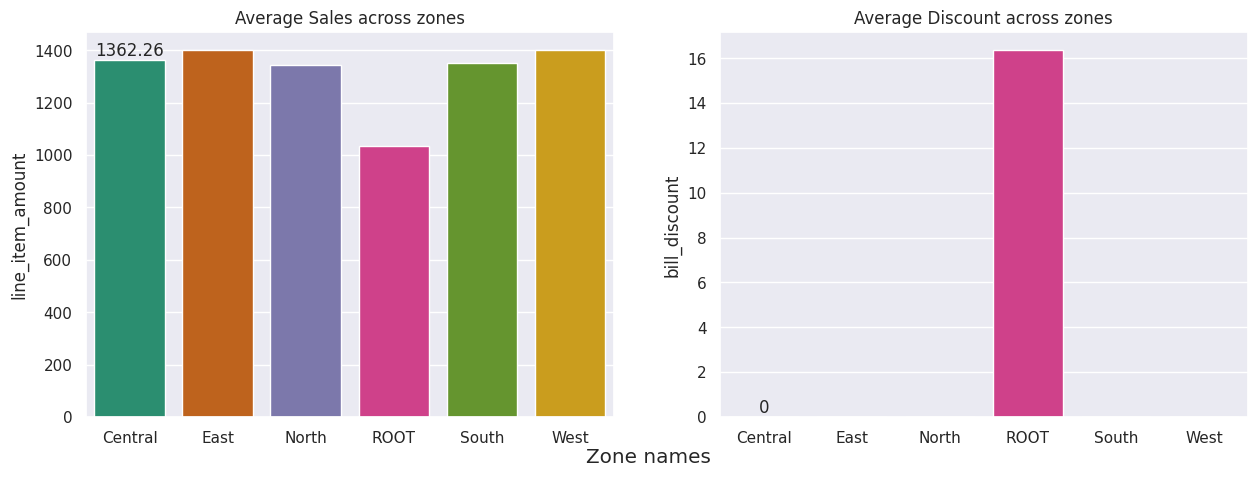

In [ ]:
# Store performance by zone
zones_sales_mean = total.groupby(['zone_name'])['line_item_amount'].median().reset_index()
zones_discount_mean = total.groupby(['zone_name'])['bill_discount'].median().reset_index()

fig,(ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

barplot(data = zones_sales_mean , x='zone_name',y='line_item_amount',ax=ax1,palette=qual_colors1,title='Average Sales across zones')

barplot(data = zones_discount_mean ,x='zone_name',y='bill_discount',ax=ax2,palette=qual_colors1,title='Average Discount across zones')

fig.supxlabel('Zone names')
fig.show()

<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: UserWarning: The palette list has more values (12) than needed (1), which may not be intended.
  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
<ipython-input-18-24541c60343b>:10: UserWarning: 
The palette list has fewer values (12) than needed (20) and will cycle, which may produce an uninterpretable plot.
  plot1 = sns.barplot(data=data,x=x,y=y,a

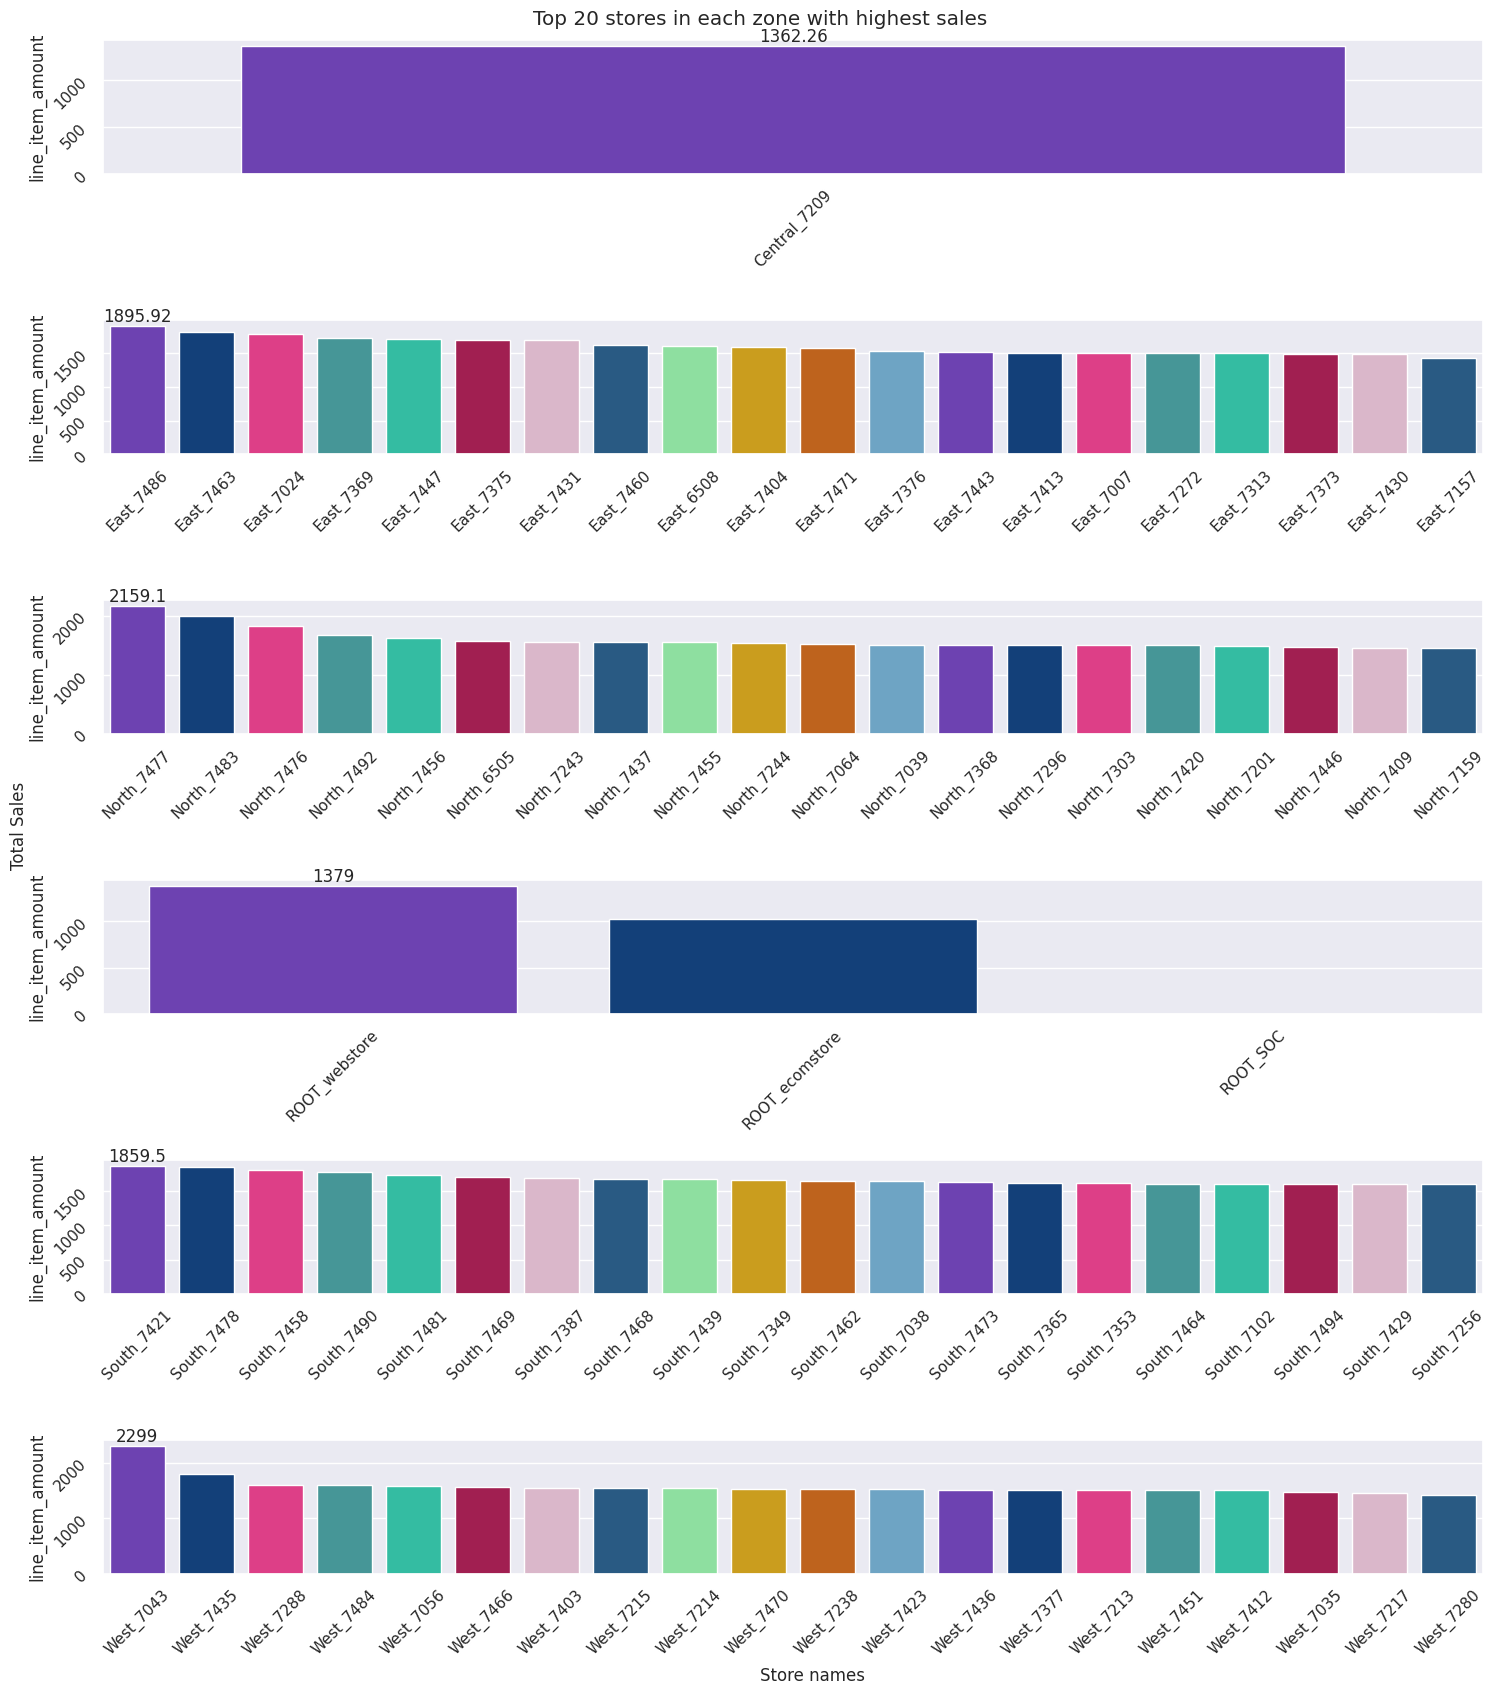

In [ ]:
# stores from each zones with highest sales
zone_and_store_sales = total.groupby(['zone_name','store_name'])['line_item_amount'].median().reset_index()

# sales in different zones stores
zones = zone_and_store_sales.zone_name.unique().tolist()

fig , ax = plt.subplots(6,figsize=(15,17))

for i,zone in enumerate(zones):
    stores_with_highest_sales = zone_and_store_sales[zone_and_store_sales['zone_name']==zone].sort_values('line_item_amount',ascending=False)[:20]

    bar = barplot(data = stores_with_highest_sales , x='store_name',y='line_item_amount',ax=ax[i],labelrotation=45,title='')

fig.suptitle('Top 20 stores in each zone with highest sales')
fig.tight_layout()

fig.text(0.00, 0.5, 'Total Sales', va='center', rotation='vertical')
fig.text(0.5, 0, 'Store names', va='center')

fig.show()


In [ ]:
# Convert the 'inventory_category' column to lowercase
total['inventory_category'] = total['inventory_category'].str.lower()
total['product'] = total['product'].str.lower()

# Display the first few rows of the concatenated dataframe
print("Concatenated DataFrame:")
print(total.head())
print(f"\nShape of the concatenated DataFrame: {total.shape}")

Concatenated DataFrame:
     user_id    bill_id  line_item_amount  bill_discount transaction_date  \
0  403252497  401641461            1049.5            0.0       2018-08-11   
1  357000026  397716483             659.4            0.0       2018-07-22   
2  372773935  362298787            1899.0            0.0       2018-01-12   
3  362714910  360637282            1799.0            0.0       2018-01-03   
4  393891557  374396867            1299.0            0.0       2018-03-29   

                                         description  \
0  TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...   
1            MB ITA14BLT016 35MM NA Olive Green 32 /   
2              TR S15-NELSON FF KANSAS Tan 36 / 92CM   
3           TR S15-BRANDON FF KANSAS Khaki 32 / 82CM   
4    MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM   

                             inventory_category         colour        size  \
0                                       trouser          Beige  44 / 112CM   
1  mb ita14blt016 35

In [ ]:
# List of all specified keywords
specified_keywords = [
'Trousers', 'Others', 'Denim', 'Jacket', 'Shirts', 'Accessories', 'Mens Shorts',
 'Mens T-Shirt', 'Boys Shirt', 'Mens Sweater', 'Mens Footwear', 'Boys T-Shirt',
 'Boys Shorts', 'Boys Sweater', 'Boys Jogger', 'Mens Bandi',
 'Mens Sportscoat', 'Mens Boxers', 'Boys Waistcoat'
    ]

# Function to calculate and display price segments
def segment_prices(keyword, exclusion_keyword=None):
    # Filter rows where 'product' contains the keyword
    if exclusion_keyword:
        keyword_data = total[total['product'].str.contains(keyword, case=False, na=False) &
                                ~total['product'].str.contains(exclusion_keyword, case=False, na=False)]
    else:
        keyword_data = total[total['product'].str.contains(keyword, case=False, na=False)]

    if 'line_item_amount' in keyword_data.columns:
        if not keyword_data.empty:
            # Calculate quantiles
            quantiles = keyword_data['line_item_amount'].quantile([0, 0.33, 0.66, 1]).tolist()
            quantiles_dict = {
                '0-33%': (quantiles[0], quantiles[1]),
                '33%-66%': (quantiles[1], quantiles[2]),
                '66%-100%': (quantiles[2], quantiles[3])
            }

            # Display min and max prices
            min_price = keyword_data['line_item_amount'].min()
            max_price = keyword_data['line_item_amount'].max()

            print(f"\nFor items containing '{keyword}':")
            print(f"Minimum price: {min_price}")
            print(f"Maximum price: {max_price}")

            # Display segments
            print("\nPrice segments based on quantiles:")
            for segment, (low, high) in quantiles_dict.items():
                print(f"{segment}: {low:.2f} to {high:.2f}")
        else:
            print(f"\nNo data found for items containing '{keyword}'.")
    else:
        print(f"\n'line_item_amount' column is not present in the filtered DataFrame for '{keyword}'.")

# Process each keyword, handling 'tshirt' and 'shirt' separately
for keyword in specified_keywords:
    if keyword == 'tshirt':
        segment_prices('tshirt', exclusion_keyword='shirt')
    elif keyword == 'shirt':
        segment_prices('shirt', exclusion_keyword='tshirt')
    else:
        segment_prices(keyword)

# Create a DataFrame for "Others" by excluding all specified categories
others_data = total[~total['product'].str.contains('|'.join(specified_keywords), case=False, na=False)]

# Segment "Others" into quantiles
if 'line_item_amount' in others_data.columns:
    if not others_data.empty:
        quantiles = others_data['line_item_amount'].quantile([0, 0.33, 0.66, 1]).tolist()
        quantiles_dict = {
            '0-33%': (quantiles[0], quantiles[1]),
            '33%-66%': (quantiles[1], quantiles[2]),
            '66%-100%': (quantiles[2], quantiles[3])
        }

        # Display min and max prices
        min_price = others_data['line_item_amount'].min()
        max_price = others_data['line_item_amount'].max()

        print(f"\nFor 'Others' category:")
        print(f"Minimum price: {min_price}")
        print(f"Maximum price: {max_price}")

        # Display segments
        print("\nPrice segments based on quantiles:")
        for segment, (low, high) in quantiles_dict.items():
            print(f"{segment}: {low:.2f} to {high:.2f}")
    else:
        print("\nNo data found for the 'Others' category.")
else:
    print("\n'line_item_amount' column is not present in the 'Others' DataFrame.")


For items containing 'Trousers':
Minimum price: 0.0
Maximum price: 28069.2

Price segments based on quantiles:
0-33%: 0.00 to 1499.00
33%-66%: 1499.00 to 2095.77
66%-100%: 2095.77 to 28069.20

For items containing 'Others':
Minimum price: 0.0
Maximum price: 641001.0

Price segments based on quantiles:
0-33%: 0.00 to 0.20
33%-66%: 0.20 to 1233.04
66%-100%: 1233.04 to 641001.00

For items containing 'Denim':
Minimum price: 0.0
Maximum price: 15392.0

Price segments based on quantiles:
0-33%: 0.00 to 1518.66
33%-66%: 1518.66 to 2198.49
66%-100%: 2198.49 to 15392.00

For items containing 'Jacket':
Minimum price: 0.0
Maximum price: 32394.6

Price segments based on quantiles:
0-33%: 0.00 to 2699.50
33%-66%: 2699.50 to 3537.36
66%-100%: 3537.36 to 32394.60

For items containing 'Shirts':
Minimum price: 0.0
Maximum price: 114199.2

Price segments based on quantiles:
0-33%: 0.00 to 1403.21
33%-66%: 1403.21 to 2082.44
66%-100%: 2082.44 to 114199.20

For items containing 'Accessories':
Minimum p